Fitting model to predict if a person has Diabetes Mellitus using Naive Bayes’ Classifier in python.

We start the programming by importing all the necessary libraries to the program which are


1.   numpy - to perform functions on linea algebra.
2.   pandas - for data processing and reading the excel file where the data is stored.
3. matplotlib.pyplot - for data visualization.
4. seaborn - for statistical data visualization.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next we import the data set which is saved in an excel file.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.xlsx to data.xlsx


In [ ]:
data = pd.read_excel(io.BytesIO(uploaded['data.xlsx']))

Next we define each column name in the excel sheet as variable for analysis. The variable name used are
* BP - To store the value of Blood pressure of each patient.
* Pregnencies - To store the value of number of pregnencies the patient has had. ">=5" if the patient has had five or more than five pregnencies else "<5".
* BMI - To store the value of Body mass index of eacj patient.
* Glucose - To store the value of amount of Blood sugar the patient has.
* Insulin - To store the value of amount of Insulin the patient has.
* Skinthickness - To store the value of skin thickness of the patient.
* DP - To store the value of Diabetes pedigree of the patient.
* Age - To store the age of the patient.
* Outcome - To store the value "Yes" if the patient has diabetes else "No".


In [ ]:
col_names = ['Pregnencies','Glucose','BP','Skinthickness','Insulin','BMI','DP','Age','Outcome']
data.columns = col_names
print(data.head)
print(data.info())

<bound method NDFrame.head of     Pregnencies  Glucose  BP  Skinthickness  Insulin   BMI     DP  Age Outcome
0           >=3      148  72             35        0  33.6  0.627   50     Yes
1            <3       85  66             29        0  26.6  0.351   31      No
2           >=3      183  64              0        0  23.3  0.672   32     Yes
3            <3       89  66             23       94  28.1  0.167   21      No
4            <3      137  40             35      168  43.1  2.288   33     Yes
..          ...      ...  ..            ...      ...   ...    ...  ...     ...
763         >=3      101  76             48      180  32.9  0.171   63      No
764          <3      122  70             27        0  36.8  0.340   27      No
765         >=3      121  72             23      112  26.2  0.245   30      No
766          <3      126  60              0        0  30.1  0.349   47     Yes
767          <3       93  70             31        0  30.4  0.315   23      No

[768 rows x 9 columns

We find the numerical and categorical variables from the list of variables and check for null values in them.

In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)
print(data[categorical].isnull().sum())
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)
data[numerical].isnull().sum()
for var in numerical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

There are 2 categorical variables

The categorical variables are :

 ['Pregnencies', 'Outcome']
Pregnencies    0
Outcome        0
dtype: int64
Pregnencies  contains  2  labels
Outcome  contains  2  labels
There are 7 numerical variables

The numerical variables are : ['Glucose', 'BP', 'Skinthickness', 'Insulin', 'BMI', 'DP', 'Age']
Glucose  contains  136  labels
BP  contains  47  labels
Skinthickness  contains  51  labels
Insulin  contains  186  labels
BMI  contains  248  labels
DP  contains  517  labels
Age  contains  52  labels


Now, we declare our dependent variable and independent variables for analysis.

In [ ]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

For testing and training purpose, we split the entire data. 70% of the entire data is used for training and rest 30% is used for testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape)
print(X_train)

(537, 8) (231, 8)
    Pregnencies  Glucose  BP  Skinthickness  Insulin   BMI     DP  Age
580          <3      151  90             46        0  42.1  0.371   21
418          <3       83  68              0        0  18.2  0.624   27
764          <3      122  70             27        0  36.8  0.340   27
363         >=3      146  78              0        0  38.5  0.520   67
757          <3      123  72              0        0  36.3  0.258   52
..          ...      ...  ..            ...      ...   ...    ...  ...
763         >=3      101  76             48      180  32.9  0.171   63
192         >=3      159  66              0        0  30.4  0.383   36
629         >=3       94  65             22        0  24.7  0.148   21
559         >=3       85  74              0        0  30.1  0.300   35
684         >=3      136  82              0        0   0.0  0.640   69

[537 rows x 8 columns]


We encode the independent categorical variable "Pregnencies"

In [ ]:
! pip install --upgrade category_encoders
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['Pregnencies'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 736 kB/s 


We check for the number of rows and columns in the data set after encoding to see if the column size has increased.

In [ ]:
print(X_train.shape)

(537, 9)


We can see that the number of columns has increased from 8 to 9.

**FEATURE SCALING**

In [ ]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
print(X_train.head())

  Pregnencies_1 Pregnencies_2   Glucose     BP Skinthickness   Insulin  \
0           1.0          -1.0  0.767442  1.125      0.666667 -0.333333   
1           1.0          -1.0 -0.813953 -0.250     -0.727273 -0.333333   
2           1.0          -1.0  0.093023 -0.125      0.090909 -0.333333   
3           0.0           0.0  0.651163  0.375     -0.727273 -0.333333   
4           1.0          -1.0  0.116279  0.000     -0.727273 -0.333333   

        BMI        DP       Age  
0  1.043011 -0.018767 -0.470588  
1 -1.526882  0.659517 -0.117647  
2  0.473118 -0.101877 -0.117647  
3  0.655914  0.380697  2.235294  
4  0.419355 -0.321716  1.352941  


We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier.

**MODEL TRAINING**

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

**PREDICT THE RESULT**

In [ ]:
y_pred = gnb.predict(X_test)
print(y_pred)

['Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


**CHECK ACCURACY SCORE**

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7532


**Compare the train-set and test-set accuracy**

Now, we will compare the train-set and test-set accuracy to check for
overfitting.

In [ ]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Training-set accuracy score: 0.7672
Training set score: 0.7672
Test set score: 0.7532


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


The training-set accuracy score is 0.7672 while the test-set accuracy to be    0.7532.These two values are quite comparable. So, there is no sign of overfitting.

**Compare model accuracy with null accuracy**

So, the model accuracy is 0.7532. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [ ]:
# check class distribution in test set
y_test.value_counts()

No     157
Yes     74
Name: Outcome, dtype: int64

In [ ]:
# check null accuracy score
null_accuracy = (157/(157+74))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6797


We can see that our model accuracy score is 0.7532 but null accuracy score is
0.6797. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

**Confusion matrix **


In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[135  22]
 [ 35  39]]

True Positives(TP) =  135

True Negatives(TN) =  39

False Positives(FP) =  22

False Negatives(FN) =  35


The confusion matrix shows 135 + 39 = 174 correct predictions and 1408 + 465 = 1873 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 135
True Negatives (Actual Negative:0 and Predict Negative:0) - 39
False Positives (Actual Negative:0 but Predict Positive:1) - 22 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 35 (Type II error)

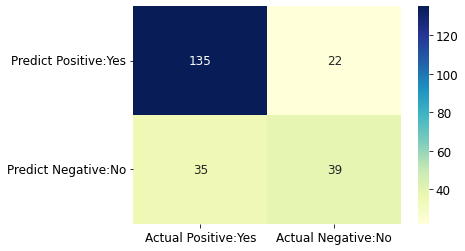

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:Yes', 'Actual Negative:No'], index=['Predict Positive:Yes', 'Predict Negative:No'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

**True Positive Rate/Sensitivity**

In [ ]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7941


**False Positive Rate**

In [ ]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3607


**True Negative Rate/Specificity**

In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6393


**False Negative Rate**

In [ ]:
fnr = FN/float(FN+TP)
print('False Negative Rate : {0:0.4f}'.format(fnr))

False Negative Rate : 0.2059


**Calculate class probabilities**


In [ ]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
print(y_pred_prob_df)
# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = gnb.predict_proba(X_test)[:, 1]


   Prob of - <=50K  Prob of - >50K
0         0.005091        0.994909
1         0.959740        0.040260
2         0.923033        0.076967
3         0.152789        0.847211
4         0.972685        0.027315
5         0.990892        0.009108
6         0.128766        0.871234
7         0.009209        0.990791
8         0.205300        0.794700
9         0.424365        0.575635


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


**ROC-AUC Curve**

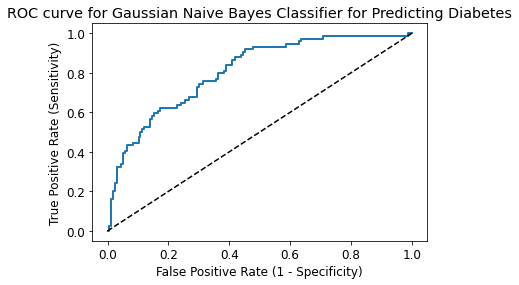

In [ ]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Diabetes')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8066
